In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_data = pd.read_csv('life_expectancy.csv')
df_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
rows, cols = df_data.shape
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  2938
Number of Columns:  22


In [4]:
# Check for null values
df_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df_data = df_data.fillna(0)
df_data['Status'] = df_data['Status'].map({'Developing':0, 'Developed':1})

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
X = df_data[['Year', 'Status', 'Adult Mortality',
             'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
             'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
             'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years',
             'Income composition of resources', 'Schooling']]
y = df_data['Life expectancy ']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
linear_model = LinearRegression()

In [11]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
print(linear_model.intercept_)

68.7065001422472


In [13]:
coe_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
coe_df

,Coefficient
Year,-5.048710e-03
Status,2.869336e+00
Adult Mortality,-1.558896e-02
infant deaths,1.381803e-01
Alcohol,2.928758e-01
percentage expenditure,-1.286444e-04
Hepatitis B,1.022886e-02
Measles,-2.588137e-07
BMI,4.377338e-02
under-five deaths,-1.041321e-01


In [14]:
predictions = linear_model.predict(X_test)

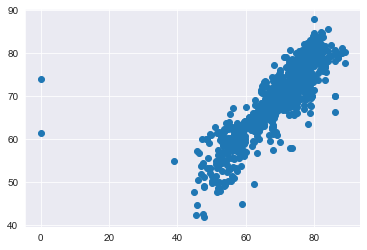

In [16]:
plt.scatter(y_test, predictions)